In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

#%matplotlib notebook

from sklearn import datasets
from io import StringIO

from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
#from sklearn.tree import export_graphviz
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

#np.set_printoptions(precision=2)

import numpy as np
np.set_printoptions(precision=2)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
#from adspy_shared_utilities import plot_class_regions_for_classifier_subplot
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.utils import resample
from imblearn.over_sampling import SMOTENC

In [2]:
dados = pd.read_csv('winequality.csv', sep = ';')

In [3]:
dados

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,White,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,White,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,White,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,White,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,White,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
5,White,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
6,White,6.2,0.320,0.16,7.00,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6
7,White,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
8,White,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
9,White,8.1,0.220,0.43,1.50,0.044,28.0,129.0,0.99380,3.22,0.45,11,6


In [4]:
dados.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [5]:
dados.shape

(6497, 13)

In [6]:
# O database original tem 13 colunas (12 features e 1 variável-resposta)
# com 6497 observações.

In [7]:
dados.count()

type                    6497
fixed acidity           6497
volatile acidity        6497
citric acid             6497
residual sugar          6497
chlorides               6497
free sulfur dioxide     6497
total sulfur dioxide    6497
density                 6497
pH                      6497
sulphates               6497
alcohol                 6497
quality                 6497
dtype: int64

In [8]:
# Não há nan ou null values no dataset fornecido

In [9]:
# Vamos obter info sobre a tipagem das variáveis:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
type                    6497 non-null object
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null object
quality                 6497 non-null int64
dtypes: float64(10), int64(1), object(2)
memory usage: 659.9+ KB


In [10]:
# Como vemos acima, no dataset , além da variável resposta Qualidade, 
# temos somente mais uma 
#variável categórica no dataset, que é tipo (type)

In [11]:
# analisando os valores distintos das features e da var. resposta
# no dataset:
for col in dados.columns:
    print('Distinct values for feature', col)
    print(pd.unique(dados[[col]].values.ravel('K')))
    print('\n')
    print('\n')

Distinct values for feature type
['White' 'Red']




Distinct values for feature fixed acidity
[ 7.    6.3   8.1   7.2   6.2   8.6   7.9   6.6   8.3   7.4   6.5   6.4
  6.8   7.6   6.9   8.5   5.8   7.3   6.7   6.    7.1   6.1   7.5   9.8
  5.5   5.9   7.8   5.7   8.2   5.6   5.2   8.4  10.2   7.7   5.3   5.4
  9.1   5.    8.   10.    5.1   9.2   9.    8.8   8.7   4.8  10.3   9.4
  9.6   9.3   8.9   9.7  10.7  14.2   9.9   9.5  11.8   4.6   6.15  4.5
  7.15  6.45  4.2   4.9   4.7   3.8   4.4   3.9  11.2  10.1  11.5  12.8
 11.   11.6  12.   15.   10.8  11.1  12.5  10.9  11.4  10.4  13.3  10.6
 13.4  11.9  12.4  12.2  13.8  13.5  10.5  12.6  14.   13.7  12.7  12.3
 15.6  11.3  13.   12.9  14.3  15.5  11.7  13.2  15.9  12.1 ]




Distinct values for feature volatile acidity
[0.27 0.3  0.28 0.23 0.32 0.22 0.18 0.16 0.42 0.17 0.48 0.66 0.34 0.31
 0.26 0.67 0.25 0.24 0.14 0.12 0.39 0.33 0.45 0.46 0.19 0.2  0.21 0.38
 0.47 0.35 0.54 0.43 0.44 0.27 0.36 0.3  0.13 0.41 0.48 0.42 0.37 0.26
 0.59

In [12]:
# COntando os distinct values de cada var

for coluna in dados.columns:
    print('Distinct values of variable: ', coluna)
    print(dados[coluna].value_counts())
    print('\n')
    print('\n')

Distinct values of variable:  type
White    4898
Red      1599
Name: type, dtype: int64




Distinct values of variable:  fixed acidity
6.80     354
6.60     327
6.40     305
7.00     282
6.90     279
7.20     273
6.70     264
7.10     257
6.50     242
7.40     238
7.30     222
6.20     212
6.30     202
7.60     199
6.00     197
7.50     175
6.10     171
7.80     146
7.70     142
5.80     125
8.00     122
7.90     116
5.90     112
8.20     101
8.30      92
5.70      90
5.60      85
8.10      82
8.40      61
8.60      52
        ... 
12.60      4
12.20      4
12.40      4
13.00      3
11.70      3
11.00      3
13.30      3
4.40       3
13.20      3
6.15       2
15.50      2
12.90      2
4.20       2
15.60      2
7.15       2
13.70      2
15.00      2
4.60       2
13.40      1
13.50      1
3.80       1
4.50       1
12.10      1
14.00      1
3.90       1
14.30      1
15.90      1
13.80      1
14.20      1
6.45       1
Name: fixed acidity, Length: 106, dtype: int64




Distinct values of v

In [13]:
# Como já mencionado anteriormente não há informações faltantes no banco de dados
dados.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

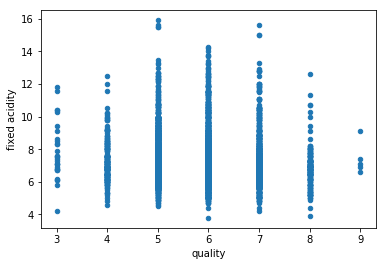

In [14]:
# Scatter plot quality x fixed acidity
dados.plot(kind="scatter", x="quality", y="fixed acidity")

In [15]:
#DO gráfico acima vê-se que os maiores valores de fixed acidity 
# estão associados Às qualidades 5 e 7. 
# Verifica-se também a presença de outliers na feature fixed acidity
# ao longo de todos os labels de quality 

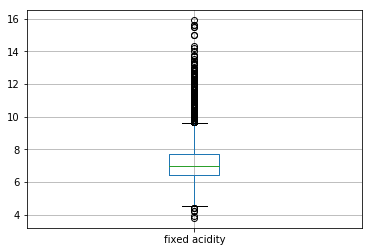

In [16]:
# Boxplot de fixed acidity
fix_acidity_boxplot = dados.boxplot(column=['fixed acidity'])

In [17]:
# Verifica-se outliers em fixed acidity

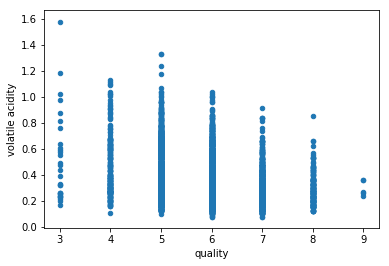

In [18]:
# Scatter plot quality x volatile acidity
dados.plot(kind="scatter", x="quality", y="volatile acidity")

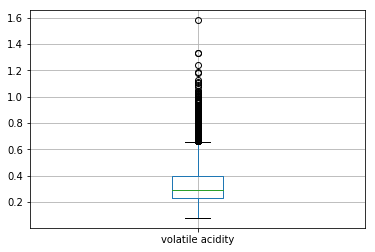

In [19]:
# Boxplot de volatile acidity
vol_acidity_boxplot = dados.boxplot(column=['volatile acidity'])

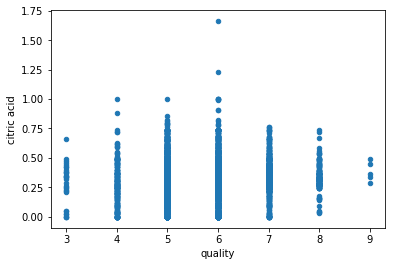

In [20]:
# Scatter plot quality x citric acid
dados.plot(kind="scatter", x="quality", y="citric acid")

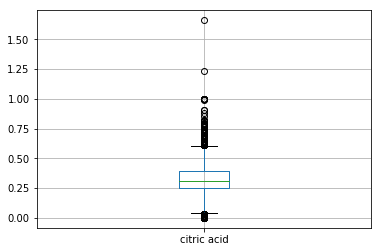

In [21]:
# Boxplot de citric acid
vol_acidity_boxplot = dados.boxplot(column=['citric acid'])

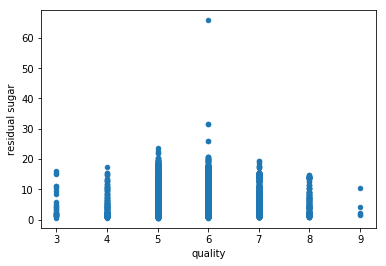

In [22]:
# Scatter plot quality x residual sugar
dados.plot(kind="scatter", x="quality", y="residual sugar")

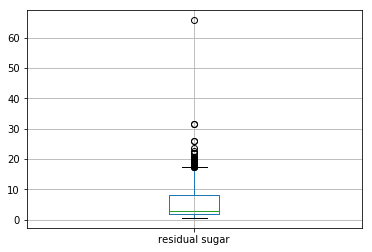

In [23]:
# Boxplot de residual sugar
res_sugar_boxplot = dados.boxplot(column=['residual sugar'])

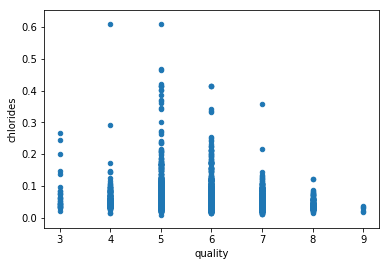

In [24]:
# Scatter plot quality x chlorides
dados.plot(kind="scatter", x="quality", y="chlorides")

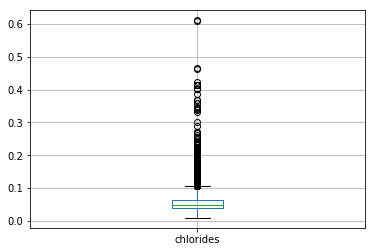

In [25]:
# Boxplot de chlorides
chol_boxplot = dados.boxplot(column=['chlorides'])

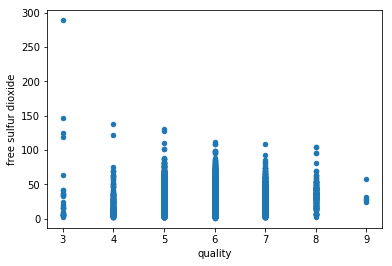

In [26]:
# Scatter plot quality x free sulfur dioxide
dados.plot(kind="scatter", x="quality", y="free sulfur dioxide")

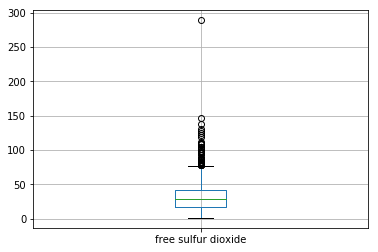

In [27]:
# Boxplot de free sulfur dioxide
f_sul_dio_boxplot = dados.boxplot(column=['free sulfur dioxide'])

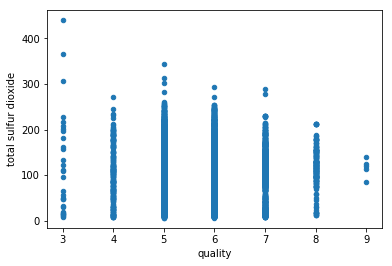

In [28]:
# Scatter plot quality x total sulfur dioxide
dados.plot(kind="scatter", x="quality", y="total sulfur dioxide")

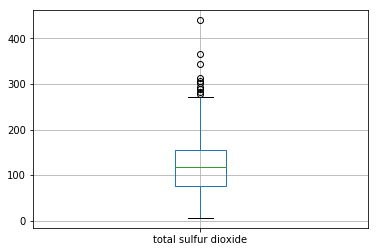

In [29]:
# Boxplot de total sulfur dioxide
t_sul_dio_boxplot = dados.boxplot(column=['total sulfur dioxide'])

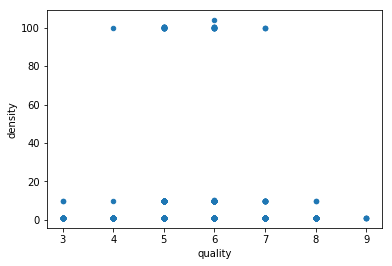

In [30]:
# Scatter plot quality x density
dados.plot(kind="scatter", x="quality", y="density")

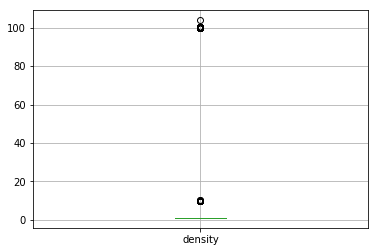

In [31]:
# Boxplot de density
density_boxplot = dados.boxplot(column=['density'])

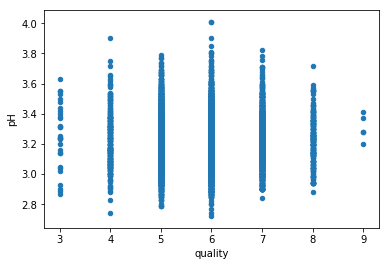

In [32]:
# Scatter plot quality x pH
dados.plot(kind="scatter", x="quality", y="pH")

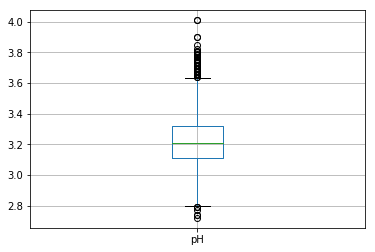

In [33]:
# Boxplot de pH
pH_boxplot = dados.boxplot(column=['pH'])

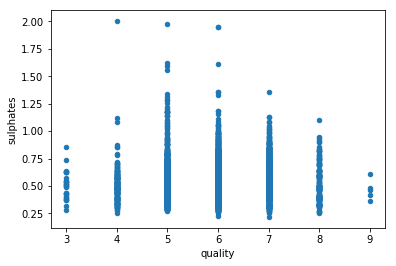

In [34]:
# Scatter plot quality x sulphates
dados.plot(kind="scatter", x="quality", y="sulphates")

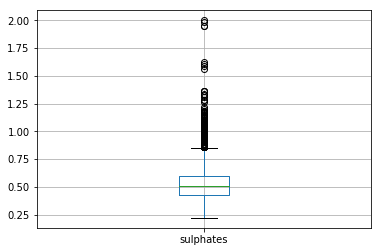

In [35]:
# Boxplot de sulphates
sulphates_boxplot = dados.boxplot(column=['sulphates'])

In [49]:
# Análise e elimina~çao de outliers para as variáveis contínuas

In [36]:
# Neste notebook, serei menos parcimonioso com relação ao critério de identificação e 
# eliminação de outliers, considerando como outliers todas as observações que, 
# Para cada feature, estiverem mais de 2,5 intervalos interquartis 
# abaixo ou acima do primeito e terceiro quartis, respectivamente, da distribuição empírica dessa
#feature.


In [37]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-2.5*iqr
    fence_high = q3+2.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [38]:
dados1 = remove_outlier(dados, 'fixed acidity')

In [39]:
dados1.shape

(6357, 13)

In [40]:
dados2 = remove_outlier(dados1, 'volatile acidity')

In [41]:
dados2.shape

(6259, 13)

In [42]:
dados3 = remove_outlier(dados2, 'citric acid')

In [43]:
dados3.shape

(6193, 13)

In [44]:
dados4 = remove_outlier(dados3, 'residual sugar')

In [45]:
dados4.shape

(6189, 13)

In [46]:
dados5 = remove_outlier(dados4, 'chlorides')

In [47]:
dados5.shape

(6018, 13)

In [48]:
dados6 = remove_outlier(dados5, 'free sulfur dioxide')

In [49]:
dados6.shape

(6003, 13)

In [50]:
dados7 = remove_outlier(dados6, 'total sulfur dioxide')

In [51]:
dados7.shape

(6001, 13)

In [52]:
dados8 = remove_outlier(dados7, 'density')

In [53]:
dados8.shape

(5921, 13)

In [54]:
dados9 = remove_outlier(dados8, 'pH')

In [55]:
dados9.shape

(5916, 13)

In [56]:
dados10 = remove_outlier(dados9, 'sulphates')

In [57]:
dados10.shape

(5884, 13)

In [58]:
# Changing the type of alcohol
dados10.alcohol = dados10.alcohol.astype(str)

C:\soft\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [59]:
dados10["alcohol"] = pd.to_numeric(dados10["alcohol"],errors='coerce')

C:\soft\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


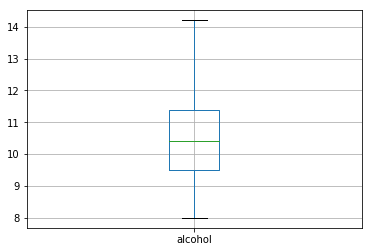

In [60]:
# Boxplot de alcohol
alcohol_boxplot = dados10.boxplot(column=['alcohol'])

In [61]:
dados10.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [62]:
dados10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5884 entries, 0 to 6496
Data columns (total 13 columns):
type                    5884 non-null object
fixed acidity           5884 non-null float64
volatile acidity        5884 non-null float64
citric acid             5884 non-null float64
residual sugar          5884 non-null float64
chlorides               5884 non-null float64
free sulfur dioxide     5884 non-null float64
total sulfur dioxide    5884 non-null float64
density                 5884 non-null float64
pH                      5884 non-null float64
sulphates               5884 non-null float64
alcohol                 5847 non-null float64
quality                 5884 non-null int64
dtypes: float64(11), int64(1), object(1)
memory usage: 643.6+ KB


In [63]:
dados11 = remove_outlier(dados10, 'alcohol')

In [64]:
dados11.shape

(5847, 13)

In [65]:
# Matriz de gráficos de dispersão (Scatterplot matrix) das features contínuas
#do dataset inteiro
# após remoção de outliers


In [66]:
continuous_features = dados11[['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]

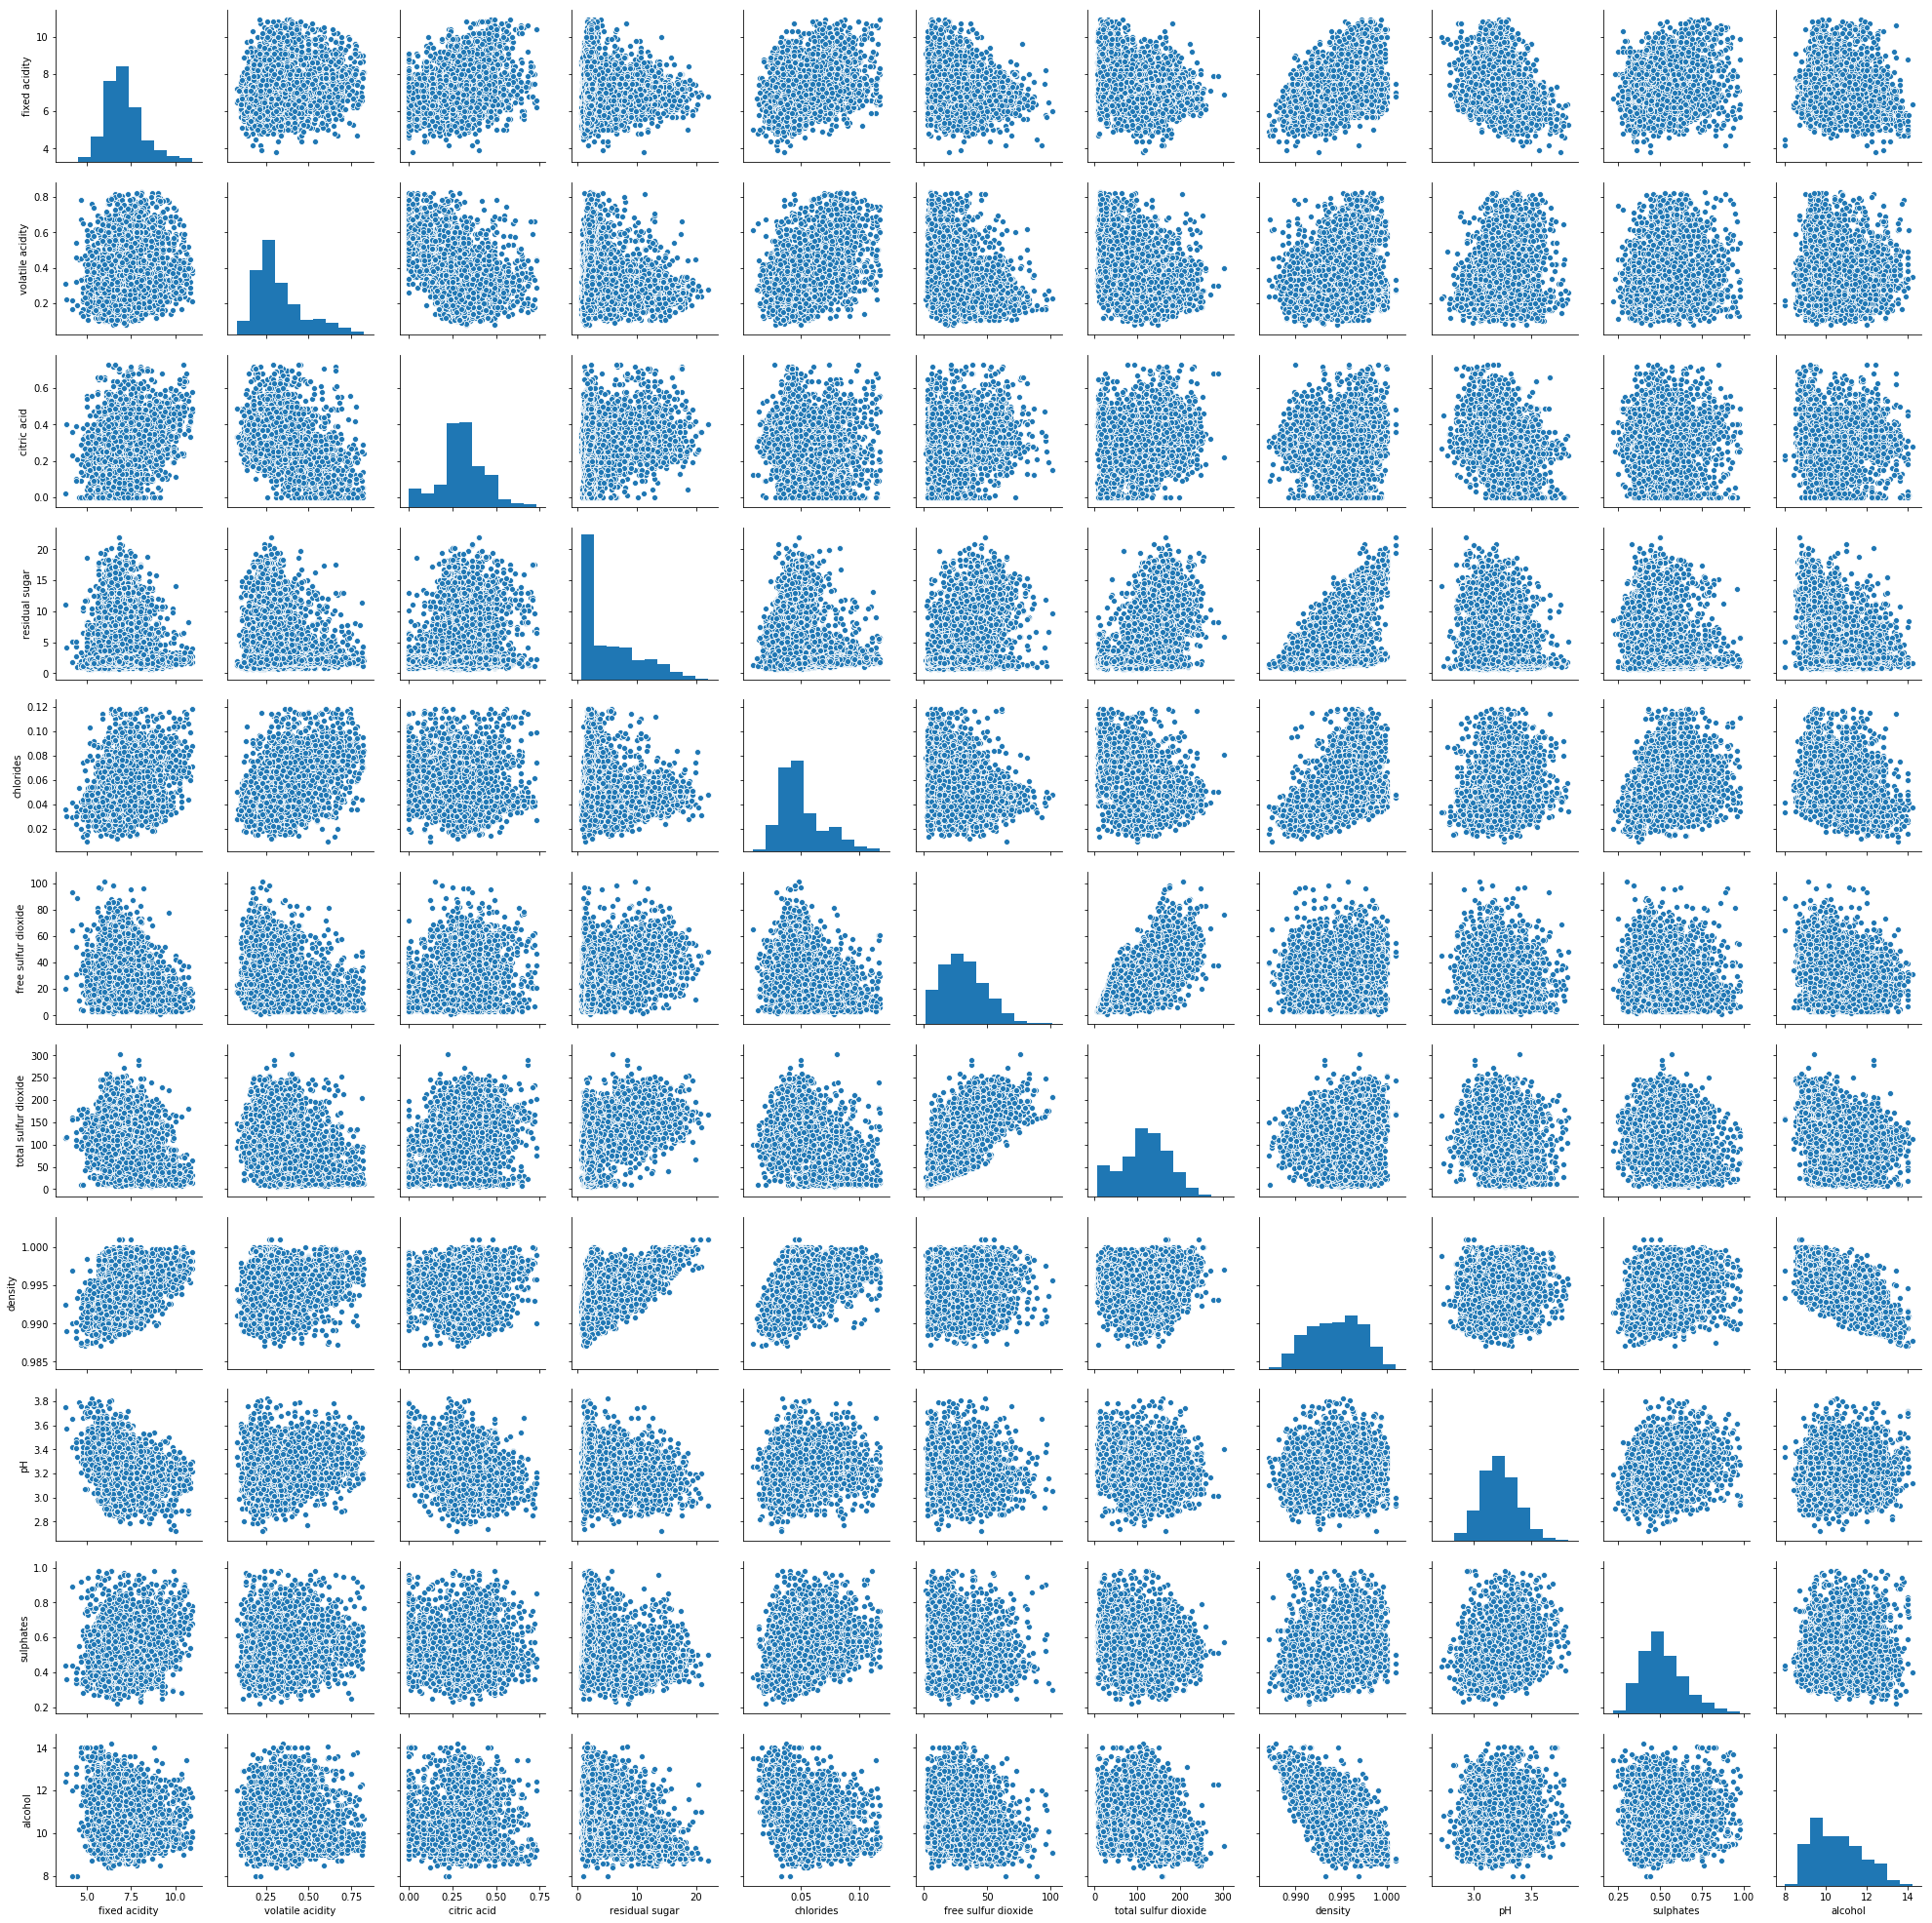

In [67]:
#plt.figure(figsize=(11,7))
sns.pairplot(continuous_features,diag_kind='hist')
#plt.tight_layout()
#plt.plot()

In [68]:
# Coment: notamos alguns padrões de correlações mais visíveis entre algumas features. 
# identificando-se alguns padrões de correlação já um pouco evidentes (embora não extremamente 
#acentuados entre as features.
# como por exemplo entre as features 
#Vamos construir uma matriz de correlaçõa abaixo:

In [69]:
corr = dados11.corr()
corr.style.background_gradient()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1,0.200575,0.242618,-0.101402,0.382224,-0.24432,-0.268395,0.38694,-0.244247,0.202246,-0.106154,-0.0879103
volatile acidity,0.200575,1,-0.439781,-0.190116,0.534107,-0.347297,-0.405317,0.252165,0.25673,0.218152,-0.0414982,-0.236774
citric acid,0.242618,-0.439781,1,0.158996,-0.186663,0.179866,0.253971,0.0225057,-0.301959,-0.0262876,0.0146065,0.0934399
residual sugar,-0.101402,-0.190116,0.158996,1,-0.133429,0.422686,0.49288,0.576103,-0.288237,-0.189618,-0.376439,-0.0419041
chlorides,0.382224,0.534107,-0.186663,-0.133429,1,-0.281304,-0.373383,0.531691,0.23456,0.35322,-0.335913,-0.255758
free sulfur dioxide,-0.24432,-0.347297,0.179866,0.422686,-0.281304,1,0.712201,0.0814004,-0.162497,-0.16062,-0.183724,0.0752807
total sulfur dioxide,-0.268395,-0.405317,0.253971,0.49288,-0.373383,0.712201,1,0.0940722,-0.253534,-0.257141,-0.282521,-0.0442048
density,0.38694,0.252165,0.0225057,0.576103,0.531691,0.0814004,0.0940722,1,0.0476021,0.213155,-0.744111,-0.32549
pH,-0.244247,0.25673,-0.301959,-0.288237,0.23456,-0.162497,-0.253534,0.0476021,1,0.295151,0.0928661,0.0281848
sulphates,0.202246,0.218152,-0.0262876,-0.189618,0.35322,-0.16062,-0.257141,0.213155,0.295151,1,0.0200717,0.0589763


In [52]:
# Da matriz de correlações acima, notamos algumas correlações bem expressivas, 
# como no caso das correlações entre density e alcohol (no valor de -0.744111) e especialmente no caso entre
# total sulfur dioxide e free sulfur dioxide, no valor de 0,712201. 
# Como se pode notar, a remoção de mais outliers, efetuada neste notebook, 
# alterou um pouco os padrões de correlação entre as features.

In [54]:
# Embora existam formas de se lidar com features signitivamente correlacionadas 
#(como feature selection, dentre outros procedimentos)
# e de alguns algoritmos de maCHINE lEARNING serem mais robustos a correlações significativas 
#entre features do que outros, 
# se irá aqui eliminar duas features: density (do par de features significativamente 
#correlacionadas, density e alcohol) e  free sulfur dioxide do problema; 
# (do par de features bastante correlacionadas, total sulfur dioxide e free sulfur dioxide) 

# COmo planejamento de experimento alternativo, recomenda-se a utilização de um algortmo de 
#selçeção de features que possam ser utilizados para SVM ou
#por exemplo a utilização de algoritmos como PCA cujo output será necessariamente composto 
#de componentes principais descorrelacionados.

# A eliminação dessas duas features é penas uma primeira abordagem do problema e se deve ao fato 
# de que features significativamente/ fortemente multicolineares não devem ser utilizadas com SVM's.

#Recomenda-se a implementação desses procedimentos alternativos e a comparação da performance dos modelos treinados com 

#essas estratégias alternativas com a performance dos modelos treinados com a eatrégia adotada aqui.



In [70]:
# Eliminando-se as features free sulfur dioxide e density
dados12 = dados11.drop(['free sulfur dioxide', 'density'], axis=1)

In [71]:
dados12.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,pH,sulphates,alcohol,quality
0,White,7.0,0.27,0.36,20.7,0.045,170.0,3.00,0.45,8.8,6
1,White,6.3,0.30,0.34,1.6,0.049,132.0,3.30,0.49,9.5,6
2,White,8.1,0.28,0.40,6.9,0.050,97.0,3.26,0.44,10.1,6
3,White,7.2,0.23,0.32,8.5,0.058,186.0,3.19,0.40,9.9,6
4,White,7.2,0.23,0.32,8.5,0.058,186.0,3.19,0.40,9.9,6


In [72]:
dados12.shape

(5847, 11)

In [62]:
# Análise dos valores das features e variável resposta do dataset

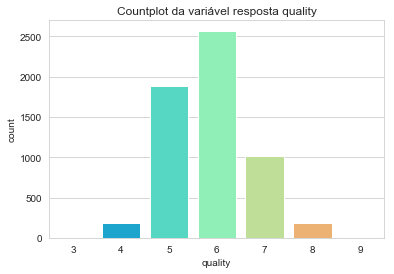

In [75]:
# Gráfico countplot da variável resposta quality

sns.set_style('whitegrid')
sns.countplot(x='quality',data=dados12,palette='rainbow').set_title('Countplot da variável resposta quality')
plt.show()

In [76]:
dados12.groupby('quality')['quality'].count()

quality
3      14
4     179
5    1881
6    2571
7    1015
8     182
9       5
Name: quality, dtype: int64

In [65]:
# Como se pode ver acima, a variável resposta quality possui classes desbalanceadas.
# a grande maioria dos casos está concentrada 
# em qualidades de 5 a 7.
# As classes 4, 8, 3 e 9 são minoritárias, sendo que a classe 9 só possui 5
# casos no dataset
# Não há casos com qualidades de 0, 1, 2 e 10!
# Portanto, como devemos treinar um modelo preditivo da qualidade do
# vinho, estamos lidando com um problema de classificação preditiva
# multiclasse (MAS NÃO MULTILABEL, pois ´apenas uma classe pode ocorrer por
# observação, isto é, não podemos observar simultaneamnete 
# mais uma de uma classe - no caso, mais de uma qualidade - em uma mesma
# oservação)

In [66]:
# Definindo a matriz de features X e o vetor da variável resposta y.
# Label encoding a feature quality

In [77]:
y=dados12['quality']
X = dados12.drop('quality', axis = 1)
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
X['type'] = le.fit_transform(dados12['type'])


In [78]:
X.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,pH,sulphates,alcohol
0,1,7.0,0.27,0.36,20.7,0.045,170.0,3.00,0.45,8.8
1,1,6.3,0.30,0.34,1.6,0.049,132.0,3.30,0.49,9.5
2,1,8.1,0.28,0.40,6.9,0.050,97.0,3.26,0.44,10.1
3,1,7.2,0.23,0.32,8.5,0.058,186.0,3.19,0.40,9.9
4,1,7.2,0.23,0.32,8.5,0.058,186.0,3.19,0.40,9.9


In [79]:
# Fazendo o random split para criação do conjunto de treinamento e teste.

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [81]:
y_test.shape

(1755,)

In [82]:
X_train.shape

(4092, 10)

In [83]:
X_test.shape

(1755, 10)

In [84]:
# Iremos usar o algoritmo SMOTE-NC para fazer over sampling das classes minoritárias, 
#no conjunto de treinamento

In [85]:
cat_feats = ['type']

In [91]:
# Usando o algoritmo SMOTE-NC de resampling
sm = SMOTENC(categorical_features= [0],random_state=0, k_neighbors=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
# Observação o número de vizinhos considerado aqui na execução do algoritmo 
# de oversampling foi diferente do utilizado no primeiro notebook, 
# haja visto que se eliminou mais observações como outliers e portanto se perdeu 
#observações nas classes minoritárias

In [92]:
X_train_res

array([[ 1.  ,  6.6 ,  0.32, ...,  3.15,  0.46,  9.6 ],
       [ 1.  ,  6.4 ,  0.3 , ...,  3.23,  0.44, 12.2 ],
       [ 0.  ,  7.2 ,  0.6 , ...,  3.46,  0.53, 11.8 ],
       ...,
       [ 1.  ,  7.17,  0.3 , ...,  3.28,  0.42, 12.59],
       [ 1.  ,  6.89,  0.36, ...,  3.28,  0.37, 12.69],
       [ 1.  ,  7.07,  0.29, ...,  3.33,  0.53, 12.46]])

In [102]:
X_train_res.shape

(12642, 10)

In [103]:
X_train_res_final = pd.DataFrame(X_train_res,columns=X_train.columns)

In [104]:
X_train_res_final.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,pH,sulphates,alcohol
0,1.0,6.6,0.320,0.36,8.0,0.047,168.0,3.15,0.46,9.6
1,1.0,6.4,0.300,0.27,4.4,0.055,135.0,3.23,0.44,12.2
2,0.0,7.2,0.605,0.02,1.9,0.096,31.0,3.46,0.53,11.8
3,1.0,7.8,0.280,0.31,2.1,0.046,208.0,3.23,0.64,9.8
4,1.0,7.3,0.220,0.26,1.5,0.040,172.0,3.27,0.48,11.2


In [105]:
y_coluna = ['quality']

In [106]:
y_train_res_final = pd.DataFrame(y_train_res,columns=y_coluna)

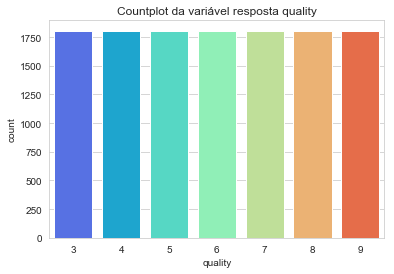

In [107]:
# Plotando as contagens em cada classe após a reamostragem efetuada com o algoritmo SMOTE-NC -
# # Dsitribuição das classes, no conjunto de treinamento após a reamostragem
sns.set_style('whitegrid')
sns.countplot(x='quality',data=y_train_res_final,palette='rainbow').set_title('Countplot da variável resposta quality')
plt.show()

In [108]:
# Distribuição das classes, no conjunto de treinamento após a reamostragem 
y_train_res_final.groupby('quality')['quality'].count()

quality
3    1806
4    1806
5    1806
6    1806
7    1806
8    1806
9    1806
Name: quality, dtype: int64

In [109]:
# Temos agora um total de 12642 obsewrvações de todas as categoriasd, sendo que
# para cada uma temos 1806 observações, no conjunto de treinamento gerado pelo algotimo de resampling SMOTE-NC!!!

In [110]:
# Se irá agora proceder ao scaling das featuress contínuas nos conjuntos de treinamento e teste

In [111]:
X_train_res_final_encoded = X_train_res_final['type']

In [112]:
X_test_encoded = X_test['type']

In [113]:
X_train_res_final_to_scale = X_train_res_final.drop('type', axis = 1)

In [114]:
X_test_to_scale = X_test.drop('type', axis = 1)

In [115]:
X_test_to_scale.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,pH,sulphates,alcohol
3595,7.2,0.16,0.29,1.00,0.031,123.0,3.12,0.40,12.1
2919,6.4,0.16,0.32,8.75,0.038,118.0,3.19,0.41,10.7
5581,8.1,0.78,0.23,2.60,0.059,15.0,3.37,0.56,11.3
1824,6.5,0.32,0.12,11.50,0.033,165.0,3.22,0.32,9.0
3246,6.8,0.22,0.41,6.70,0.034,116.0,3.18,0.46,11.5


In [116]:
X_test_to_scale = X_test_to_scale.reset_index()
X_test_to_scale = X_test_to_scale.drop('index', axis = 1)
X_test_to_scale.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,pH,sulphates,alcohol
0,7.2,0.16,0.29,1.00,0.031,123.0,3.12,0.40,12.1
1,6.4,0.16,0.32,8.75,0.038,118.0,3.19,0.41,10.7
2,8.1,0.78,0.23,2.60,0.059,15.0,3.37,0.56,11.3
3,6.5,0.32,0.12,11.50,0.033,165.0,3.22,0.32,9.0
4,6.8,0.22,0.41,6.70,0.034,116.0,3.18,0.46,11.5


In [117]:
X_train_res_final_to_scale.shape

(12642, 9)

In [125]:
# Scaling as features contínuas com StandardScaler, de forma independente 
#nos conjuntos de treinamento e teste para não se incocorrer em Data Leaking
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns_to_scale  = ['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides',
       'total sulfur dioxide', 'pH', 'sulphates', 'alcohol']
scaled_columns_train  = scaler.fit_transform(X_train_res_final_to_scale[columns_to_scale])
#scaled_columns_train


In [126]:
X_train_res_scaled = pd.DataFrame(scaled_columns_train,columns=columns_to_scale)
#X_train_res_scaled.head()


In [127]:
X_train_res_scaled.shape

(12642, 9)

In [128]:
scaled_columns_test  = scaler.fit_transform(X_test_to_scale[columns_to_scale])
scaled_columns_test
X_test_scaled = pd.DataFrame(scaled_columns_test,columns=columns_to_scale)
#X_test_scaled.head()


In [129]:
X_tudo_train_res = X_train_res_scaled.join(X_train_res_final_encoded)

In [130]:
X_tudo_train_res[['type']] = X_tudo_train_res[['type']].astype(int)

In [132]:
X_tudo_train_res.shape

(12642, 10)

In [133]:
scaled_columns_test  = scaler.fit_transform(X_test_to_scale[columns_to_scale])
scaled_columns_test
X_test_scaled = pd.DataFrame(scaled_columns_test,columns=columns_to_scale)
#X_test_scaled.head()




In [134]:
X_test_encoded.head()

3595    1
2919    1
5581    0
1824    1
3246    1
Name: type, dtype: int32

In [135]:
# Resetando os índices do dataframe X_test_encoded
X_test_encoded = X_test_encoded.reset_index()
X_test_encoded = X_test_encoded.drop('index', axis=1)
X_test_encoded.head()

,type
0,1
1,1
2,0
3,1
4,1


In [137]:
X_tudo_test = X_test_scaled.join(X_test_encoded)

In [136]:
#X_tudo_test.head()

In [138]:
X_tudo_test[['type']] = X_tudo_test[['type']].astype(int)
#X_tudo_test.head()

In [140]:
# COntagens das categorias em y_test
y_test.value_counts()

6    765
5    557
7    321
8     57
4     48
3      5
9      2
Name: quality, dtype: int64

In [141]:
# Treinamento de classificadores com GridSearch
# e com o conjunto de treinamento obtido por up sampling das classes com o algoritmo SMOTE-NC

In [142]:
# Última Abordagem para a solução do problema: Treinamento de um classificador SVM, com kernel RBF, e conjunto de treinamento com classes balanceadas 
# por meio de reamostragem (superamostragem, ou up sampling das classes minoritárias) com o algoritmo SMOTE-NC
# E uso de Grid Search, e usando como scoring de cross validação, a métrica F1, com estratégia de micro average
# Cross Validação com 4-fold. Treinamento efetuado com um critério menos parcimonioso na eliminação de outliers.

In [143]:
param_grid = {'C': [0.1,1, 5, 6, 7, 8, 9, 10], 'gamma': [0.001,0.01,0.05,0.1,1,10,100], 'kernel': ['rbf']}

In [144]:
from sklearn.model_selection import GridSearchCV

In [145]:
# Treinando o classificador SVM com kernel RBF, GridSearch no conjunto de treinamento obtido com SMOTE-NC
grid_f1_score_com_smotenc = GridSearchCV(SVC(),param_grid,refit=True,verbose=1, scoring='f1_micro', cv=4)
grid_f1_score_com_smotenc.fit(X_tudo_train_res,y_train_res_final.values.ravel())

Fitting 4 folds for each of 56 candidates, totalling 224 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 224 out of 224 | elapsed: 48.9min finished


GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 5, 6, 7, 8, 9, 10], 'gamma': [0.001, 0.01, 0.05, 0.1, 1, 10, 100], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_micro', verbose=1)

In [154]:
# Scores Médios de validação cruzada em cada combinação de hiperparametros
res = grid_f1_score_com_smotenc.cv_results_['mean_train_score'].reshape(-1, 1)
res

array([[0.32],
       [0.5 ],
       [0.62],
       [0.67],
       [0.82],
       [0.61],
       [0.57],
       [0.49],
       [0.61],
       [0.71],
       [0.77],
       [0.97],
       [1.  ],
       [1.  ],
       [0.53],
       [0.66],
       [0.77],
       [0.83],
       [1.  ],
       [1.  ],
       [1.  ],
       [0.53],
       [0.66],
       [0.77],
       [0.84],
       [1.  ],
       [1.  ],
       [1.  ],
       [0.54],
       [0.67],
       [0.78],
       [0.85],
       [1.  ],
       [1.  ],
       [1.  ],
       [0.54],
       [0.67],
       [0.78],
       [0.85],
       [1.  ],
       [1.  ],
       [1.  ],
       [0.54],
       [0.68],
       [0.79],
       [0.85],
       [1.  ],
       [1.  ],
       [1.  ],
       [0.54],
       [0.68],
       [0.79],
       [0.86],
       [1.  ],
       [1.  ],
       [1.  ]])

In [155]:
# Matriz de confusão e relatório de classificação no conjunto de treinamento
grid_f1_score_com_smotenc_predictions_train = grid_f1_score_com_smotenc.predict(X_tudo_train_res)
print(confusion_matrix(y_train_res_final, grid_f1_score_com_smotenc_predictions_train))


[[1806    0    0    0    0    0    0]
 [   0 1806    0    0    0    0    0]
 [   0    0 1797    9    0    0    0]
 [   0    2   12 1783    8    1    0]
 [   0    0    0    2 1803    1    0]
 [   0    0    0    1    0 1805    0]
 [   0    0    0    0    0    0 1806]]


In [161]:
print(classification_report(y_train_res_final, grid_f1_score_com_smotenc_predictions_train))

              precision    recall  f1-score   support

           3       1.00      1.00      1.00      1806
           4       1.00      1.00      1.00      1806
           5       0.99      1.00      0.99      1806
           6       0.99      0.99      0.99      1806
           7       1.00      1.00      1.00      1806
           8       1.00      1.00      1.00      1806
           9       1.00      1.00      1.00      1806

   micro avg       1.00      1.00      1.00     12642
   macro avg       1.00      1.00      1.00     12642
weighted avg       1.00      1.00      1.00     12642



In [162]:
# Melhor combinação de hiperparÂmetros encontrada para o SVC:
grid_f1_score_com_smotenc.best_params_

{'C': 6, 'gamma': 1, 'kernel': 'rbf'}

In [163]:
# Melhor estimador baseado nos scores de validação cruzada:
grid_f1_score_com_smotenc.best_estimator_

SVC(C=6, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [165]:
# Avaliação no conjunto de teste

# Matriz de confusão n oconjunto de teste
grid_f1_score_com_smotenc_predictions = grid_f1_score_com_smotenc.predict(X_tudo_test)
print(confusion_matrix(y_test, grid_f1_score_com_smotenc_predictions))


[[  0   0   4   1   0   0   0]
 [  0   8  17  20   2   1   0]
 [  0  20 354 157  23   3   0]
 [  0  13 128 500 111  12   1]
 [  0   4  14 138 151  14   0]
 [  0   1   5  18  16  16   1]
 [  0   0   0   1   1   0   0]]


In [166]:
# Relatório de classificação no conjunto de teste
print(classification_report(y_test, grid_f1_score_com_smotenc_predictions))


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.17      0.17      0.17        48
           5       0.68      0.64      0.66       557
           6       0.60      0.65      0.62       765
           7       0.50      0.47      0.48       321
           8       0.35      0.28      0.31        57
           9       0.00      0.00      0.00         2

   micro avg       0.59      0.59      0.59      1755
   macro avg       0.33      0.32      0.32      1755
weighted avg       0.58      0.59      0.58      1755



C:\soft\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\soft\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\soft\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [167]:
# Acurácia média do modelo no conjunto de teste
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, grid_f1_score_com_smotenc_predictions))


0.5863247863247864
